In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import radvel
from scipy.stats import pearsonr
import matplotlib.gridspec as gridspec

Text(0.5, 0, 'Time [JD]')

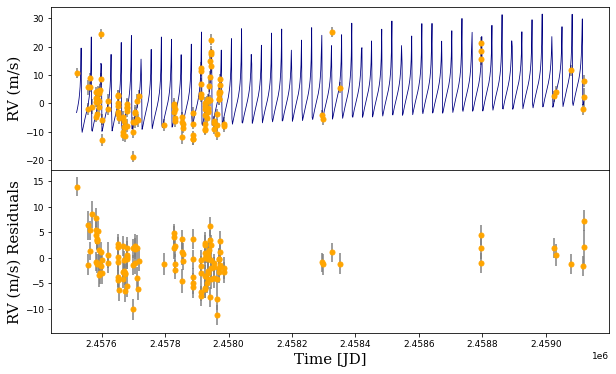

In [17]:
# plot RV as a function of time

# to do : color code the ones that we obtained since Brady 2018?

# load data
data = pd.read_csv('ck00367_rv.csv', header=14)
rv = data['mnvel'].to_numpy();rv_err = data['errvel'].to_numpy()
Svalue = data['svalue'].to_numpy();Svalue_err = data['svalue_err'].to_numpy()
t = data['bjd'].to_numpy()

# load model
inner_planet_posterior = pickle.load(open("../Radvel_MCMC/1PlanetLinearResults/1PlanetLinearResults_post_obj.pkl","rb"))
#inner_planet_posterior = pickle.load(open("../Radvel_MCMC/1PlanetNoLinearResults/1PlanetNoLinearResults_post_obj.pkl", "rb"))
model_obj = inner_planet_posterior.likelihood.like_list[0]
inner_planet_model = model_obj.model(t)
rv_subtracted = rv-inner_planet_model

# make model RV curve for plotting
t_rvcurve = np.linspace(t.min(),t.max(),1000)
rvcurve = model_obj.model(t_rvcurve)

# plot RV versus time
fig,axes=plt.subplots(2,1,sharex=True,figsize=(10,6))
plt.subplots_adjust(wspace=0, hspace=0)

axes[0].errorbar(t,rv,yerr=rv_err,fmt='o', color='orange',ecolor='grey')
axes[0].plot(t_rvcurve,rvcurve,'-', color='navy', linewidth=0.8)
axes[0].set_ylabel('RV (m/s)',fontsize=15,family='serif')
axes[0].set_xlabel('Time [JD]', fontsize=15,family='serif')

axes[1].errorbar(t,rv_subtracted,yerr=rv_err,fmt='o', color='orange',ecolor='grey')
axes[1].set_ylabel('RV (m/s) Residuals',fontsize=15,family='serif')
axes[1].set_xlabel('Time [JD]', fontsize=15,family='serif')

Text(0, 0.5, 'RV (m/s), inner planet subtracted')

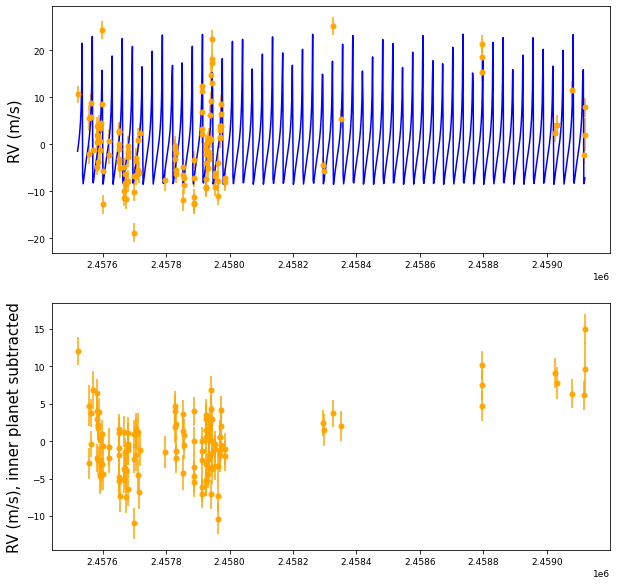

In [3]:
# plot RV as a function of time

# load data
data = pd.read_csv('ck00367_rv.csv', header=14)
rv = data['mnvel'].to_numpy();rv_err = data['errvel'].to_numpy()
Svalue = data['svalue'].to_numpy();Svalue_err = data['svalue_err'].to_numpy()
t = data['bjd'].to_numpy()

# load model
#inner_planet_posterior = pickle.load(open("../Radvel_MCMC/1PlanetLinearResults/1PlanetLinearResults_post_obj.pkl","rb"))
inner_planet_posterior = pickle.load(open("../Radvel_MCMC/1PlanetNoLinearResults/1PlanetNoLinearResults_post_obj.pkl", "rb"))
model_obj = inner_planet_posterior.likelihood.like_list[0]
inner_planet_model = model_obj.model(t)
rv_subtracted = rv-inner_planet_model

# make model RV curve for plotting
t_rvcurve = np.linspace(t.min(),t.max(),1000)
rvcurve = model_obj.model(t_rvcurve)

# plot RV versus time
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.errorbar(t,rv,yerr=rv_err,fmt='o', color='orange')
plt.plot(t_rvcurve,rvcurve,'b-')
plt.ylabel('RV (m/s)',fontsize=15)

plt.subplot(212)
plt.errorbar(t,rv_subtracted,yerr=rv_err,fmt='o', color='orange')
plt.ylabel('RV (m/s), inner planet subtracted',fontsize=15)

(array([-15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.]),
 <a list of 8 Text major ticklabel objects>)

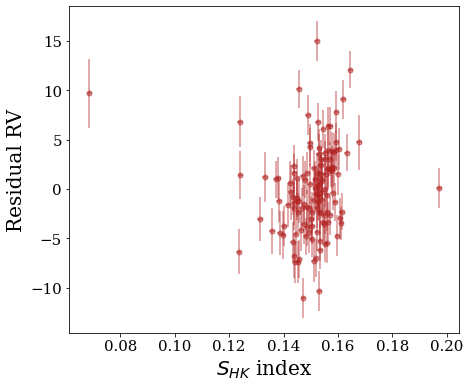

In [4]:
# plot inner planet-subtracted RV versus S value
#plt.figure(figsize=(15,6))
#plt.subplot(121)
#plt.errorbar(Svalue,rv,yerr=rv_err,xerr=Svalue_err,fmt='o',color='firebrick',alpha=0.5)
#plt.xlabel(r'$S_{HK}$',fontsize=20,family='serif')
#plt.ylabel('RV (m/s), total',fontsize=15,family='serif')

plt.figure(figsize=(7,6))
plt.errorbar(Svalue,rv_subtracted,yerr=rv_err,xerr=Svalue_err,fmt='o',color='firebrick',alpha=0.5)
plt.xlabel(r'$S_{HK}$ index',fontsize=20,family='serif')
plt.ylabel('Residual RV',fontsize=20,family='serif')
plt.xticks(fontsize=15,family='serif')
plt.yticks(fontsize=15,family='serif')

In [13]:
# calculate Pearson correlation coefficient

# including all data points
rvalue_full, pvalue_full = pearsonr(Svalue, rv_subtracted)
print('Pearson r value, full data set:', rvalue_full)

# omit both end data points
rvalue, pvalue = pearsonr(Svalue[1:-1], rv_subtracted[1:-1])
print('Pearson r value, end points omitted:', rvalue)

Pearson r value, full data set: 0.047219090242714715
Pearson r value, end points omitted: 0.01639782771340023
